In [1]:
import seaborn as sns
import quickplot as qplt
import matplotlib.pyplot as mplt

# sns.set_theme()
# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

In [2]:
df = sns.load_dataset('tips').assign(tip_pct = lambda x: x.tip/x.total_bill)
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


## Histogram

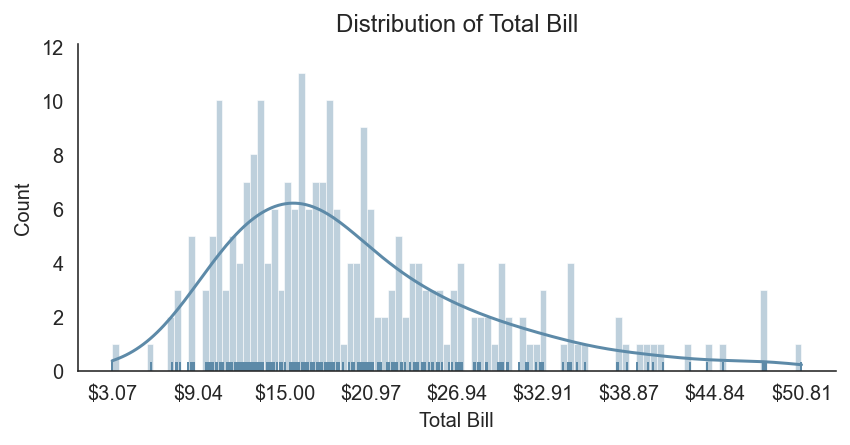

In [3]:
qplt.histogram(df, 'total_bill', nbins=100, xlab='Total Bill', x_as_usd=True, x_decimals=2, 
               width=6, height=3, color='#5d8aa8')
mplt.title('Distribution of Total Bill')
mplt.savefig('hist01.png', dpi=300)

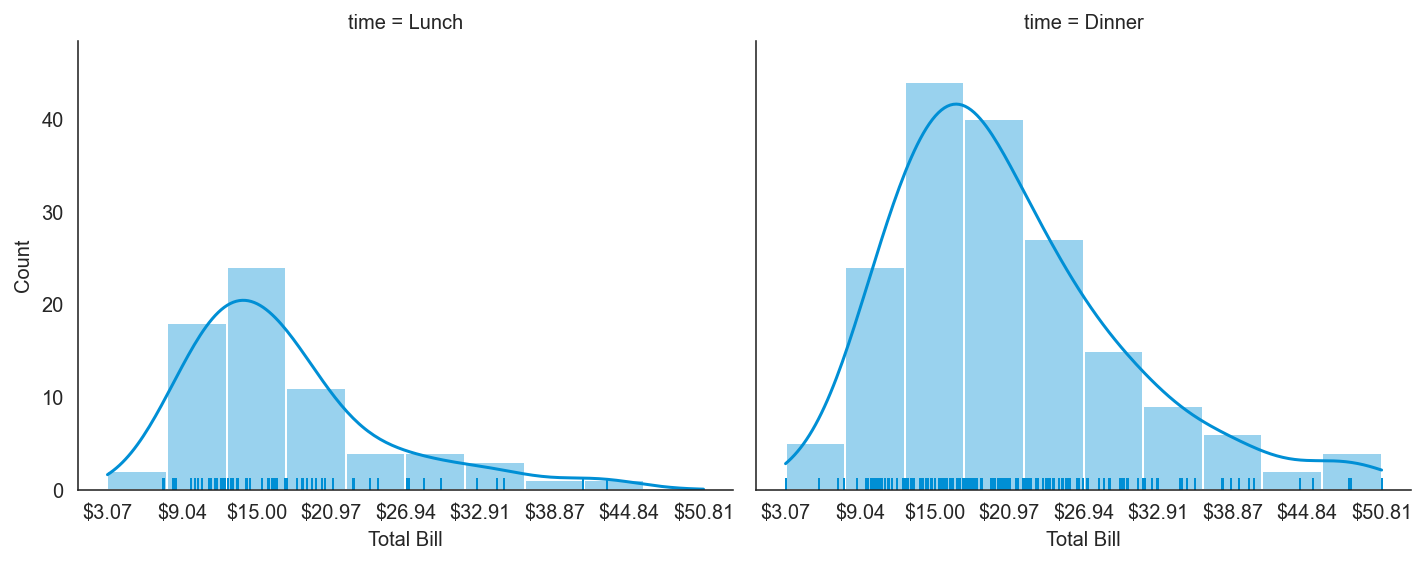

In [4]:
# use default color, which is fivethirtyeight blue ('#008FD5')
# use default color transparency (0.4)
# use default width (10 inches) and height (4 inches)
# show x tick values as USD with 2 decimals
qplt.histogram(df, 'total_bill', gpvar='time', nbins=10, xlab='Total Bill', x_as_usd=True, x_decimals=2) 
mplt.savefig('hist02.png', dpi=300)

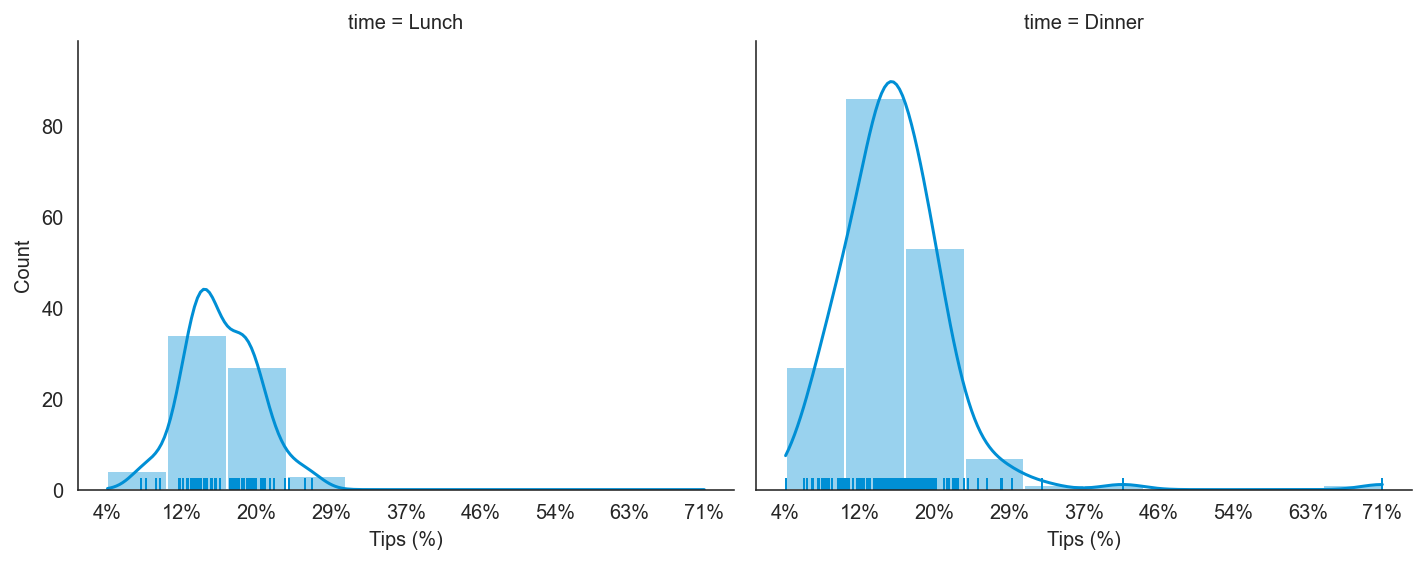

In [5]:
# show x tick values as percentage with 0 decimals
qplt.histogram(df, 'tip_pct', gpvar='time', nbins=10, xlab='Tips (%)', x_as_pct=True, x_decimals=0, alpha=0.4)
mplt.savefig('hist03.png', dpi=300)

## Barchart

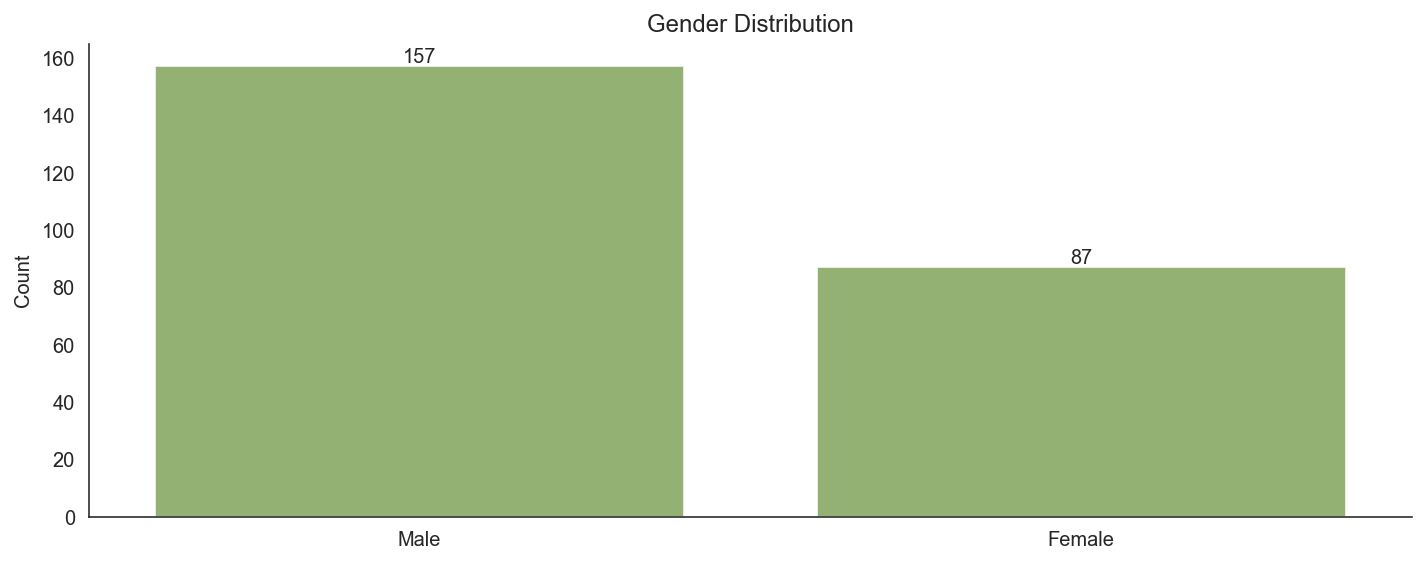

In [6]:
ha = df['sex'].value_counts()
ha.name = 'count'
ha.index.name = 'gender'
ha = ha.to_frame().reset_index()

# use default color, fivethirtyeight green ('#77AB43'), and default transparency (0.8)
# remove x label by setting `xlab=''`
qplt.barplot(ha, 'gender', 'count', title='Gender Distribution', xlab='', ylab='Count')
mplt.savefig('bars01.png', dpi=300)

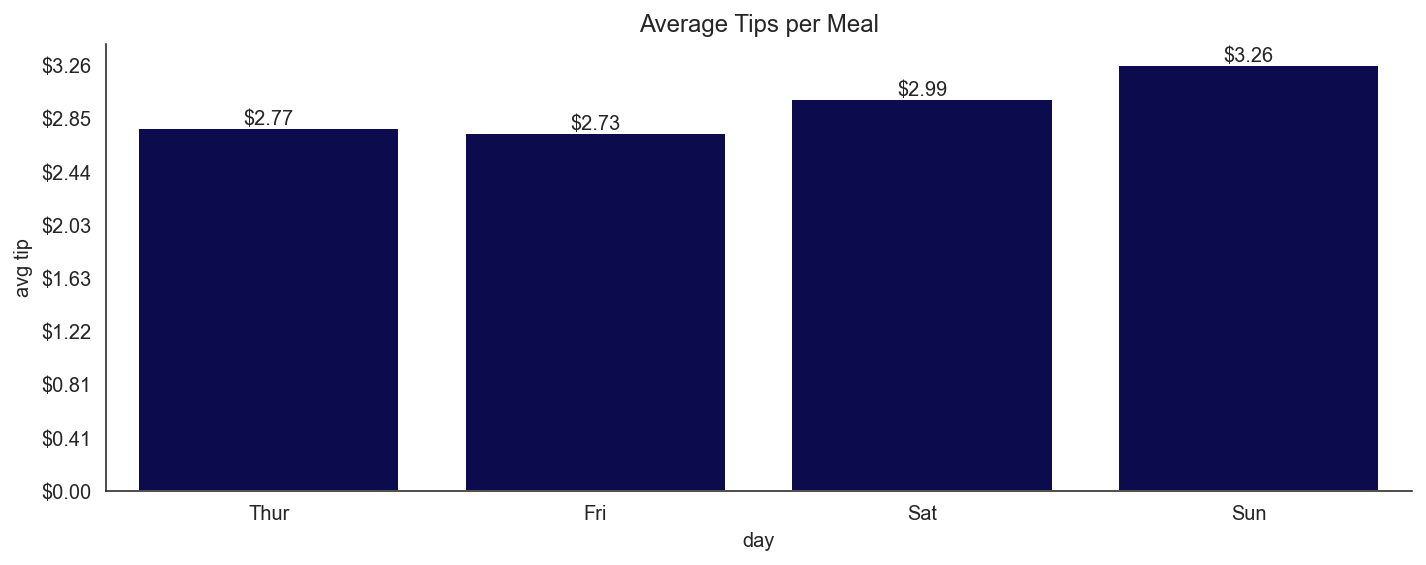

In [7]:
ha = df.groupby('day')['tip'].mean()
ha.name = 'avg tip'
ha.index.name = 'day'
ha = ha.to_frame().reset_index()

qplt.barplot(ha, 'day', 'avg tip', title = 'Average Tips per Meal',
             color_above_zero=qplt.gmx_blue, alpha=1, y_as_usd=True, y_decimals=2, bar_label_decimals=2)
mplt.savefig('bars02.png', dpi=300)

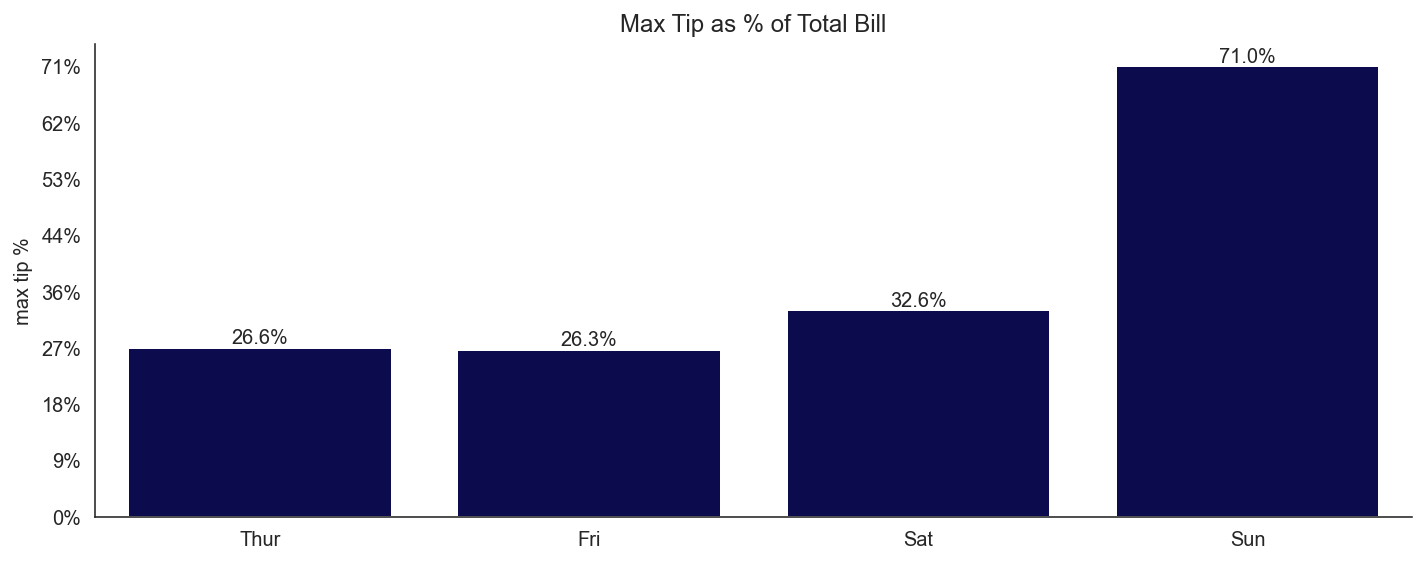

In [8]:
ha = df.groupby('day')['tip_pct'].max()
ha.name = 'max tip %'
ha.index.name = 'day'
ha = ha.to_frame().reset_index()

qplt.barplot(ha, 'day', 'max tip %', title = 'Max Tip as % of Total Bill', xlab='',
             color_above_zero=qplt.gmx_blue, alpha=1, y_as_pct=True, bar_label_decimals=1)
mplt.savefig('bars03.png', dpi=300)

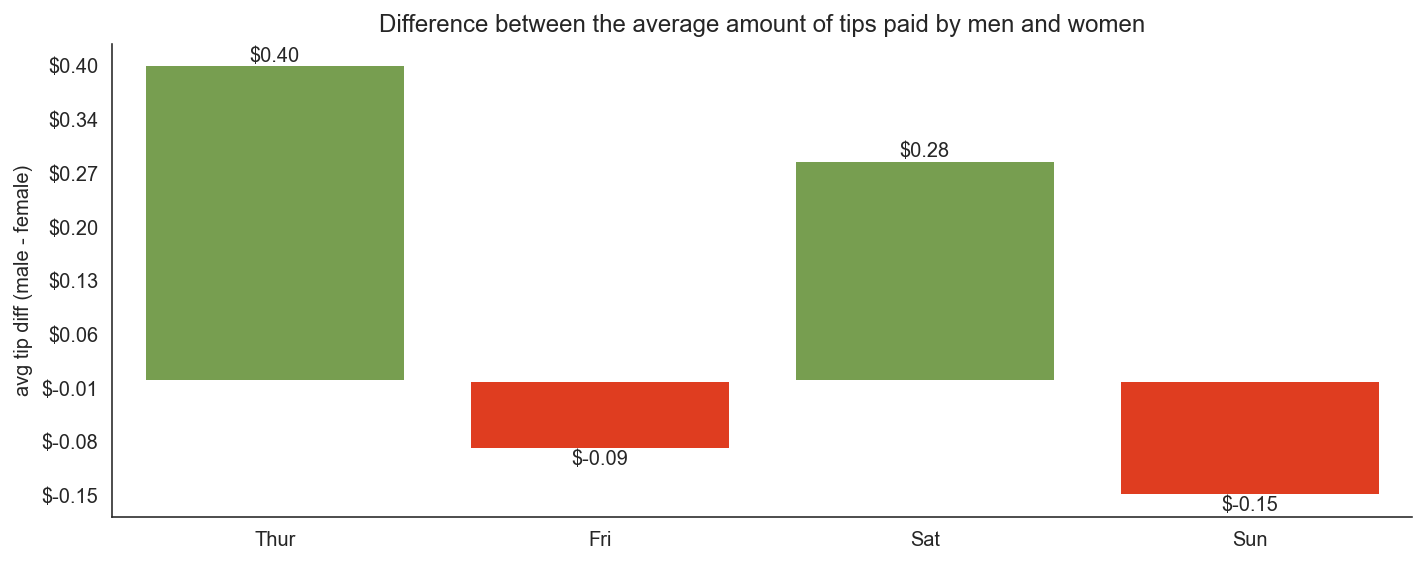

In [9]:
ha = df.groupby(['day', 'sex'])['tip'].mean()
ha = ha.to_frame().reset_index()
ha = ha.pivot(index='day', columns='sex', values='tip')
ha = (ha.Male - ha.Female)
ha.name = 'avg tip diff (male - female)'
ha = ha.to_frame().reset_index()

qplt.barplot(ha, 'day', 'avg tip diff (male - female)', 
             title='Difference between the average amount of tips paid by men and women',
             xlab='', y_as_usd=True, y_decimals=2, alpha=1, bar_label_decimals=2,
            )
mplt.savefig('bars04.png', dpi=300)

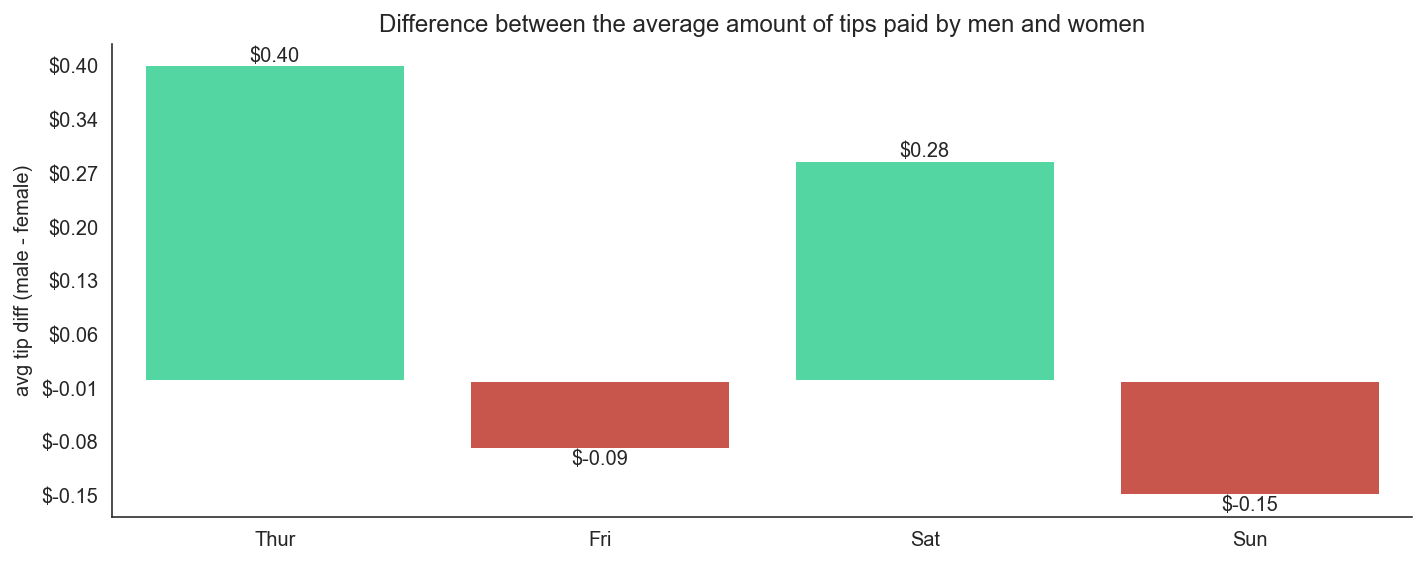

In [10]:
qplt.barplot(ha, 'day', 'avg tip diff (male - female)', 
             title='Difference between the average amount of tips paid by men and women',
             xlab='', y_as_usd=True, y_decimals=2, alpha=1,
             color_above_zero=qplt.gns_green, color_below_zero=qplt.avax_red, bar_label_decimals=2
            )
mplt.savefig('bars05.png', dpi=300)

## Dodged Barcharts

In [11]:
ha = df.groupby(['day', 'sex'])[['tip_pct', 'total_bill']].max()
ha = ha.reset_index()
ha

,day,sex,tip_pct,total_bill
0,Thur,Male,0.266312,41.19
1,Thur,Female,0.211509,43.11
2,Fri,Male,0.223776,40.17
3,Fri,Female,0.263480,22.75
4,Sat,Male,0.291990,50.81
5,Sat,Female,0.325733,44.30
6,Sun,Male,0.710345,48.17
7,Sun,Female,0.416667,35.26


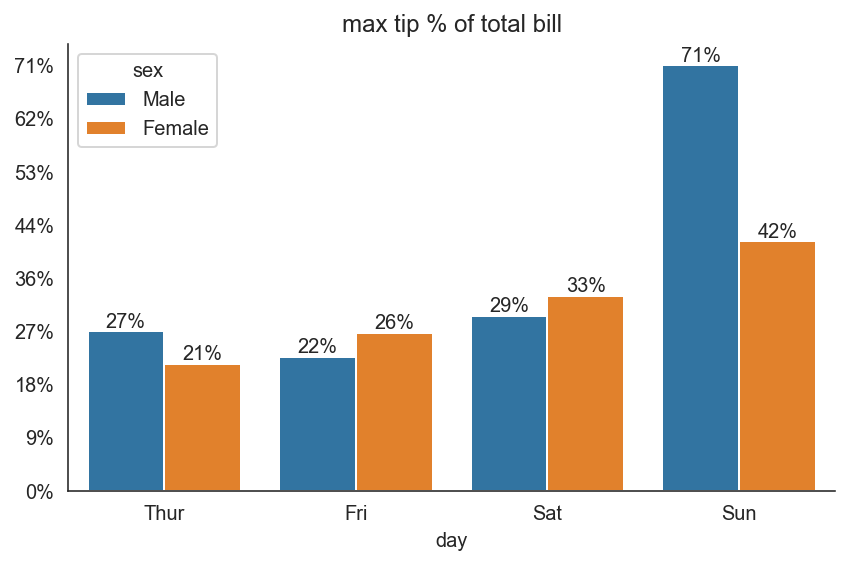

In [12]:
qplt.dodged_barplot(ha, 'day', 'tip_pct', 'sex', title='max tip % of total bill', ylab='',
                    y_as_pct=True, alpha=1, width=6)
mplt.savefig('bars06.png', dpi=300)

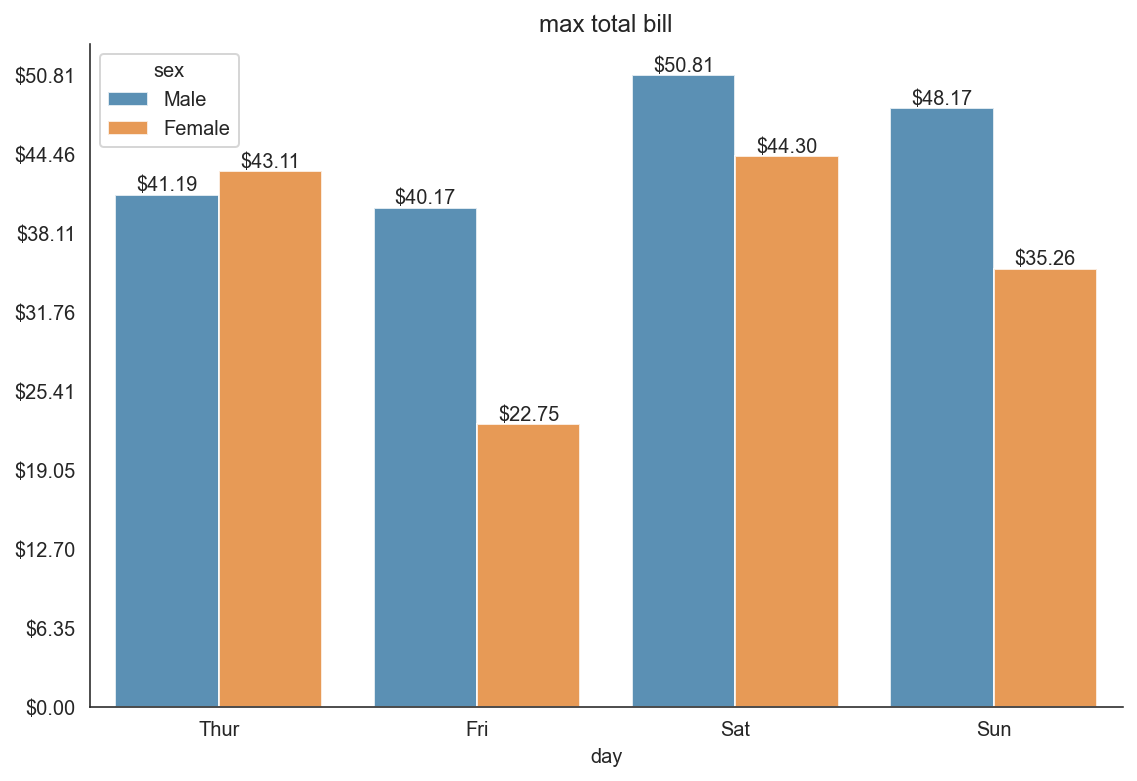

In [13]:
qplt.dodged_barplot(ha, 'day', 'total_bill', 'sex', title='max total bill', ylab='',
                    y_as_usd=True, y_decimals=2, width=8, height=5.5, bar_label_decimals=2)
mplt.savefig('bars07.png', dpi=300)

## TODO

2. make stacked barcharts

## Stacked Barcharts

In [14]:
# https://stackoverflow.com/questions/59038979/stacked-bar-chart-in-seaborn